In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

import os

In [ ]:
df=pd.read_csv('/content/summary.csv')
df.head()

,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,...,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [ ]:
df.describe()

,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [ ]:
df.isnull().sum()

Name                  0
GamesPlayed           0
MinutesPlayed         0
PointsPerGame         0
FieldGoalsMade        0
FieldGoalsAttempt     0
FieldGoalPercent      0
3PointMade            0
3PointAttempt         0
3PointPercent        11
FreeThrowMade         0
FreeThrowAttempt      0
FreeThrowPercent      0
OffensiveRebounds     0
DefensiveRebounds     0
Rebounds              0
Assists               0
Steals                0
Blocks                0
Turnovers             0
Target                0
dtype: int64

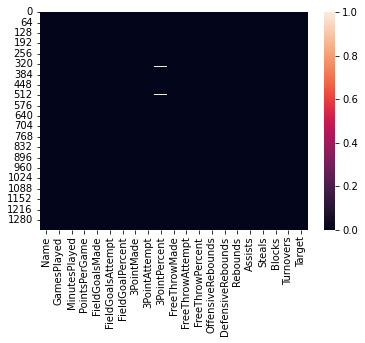

In [ ]:
sns.heatmap(df.isnull())

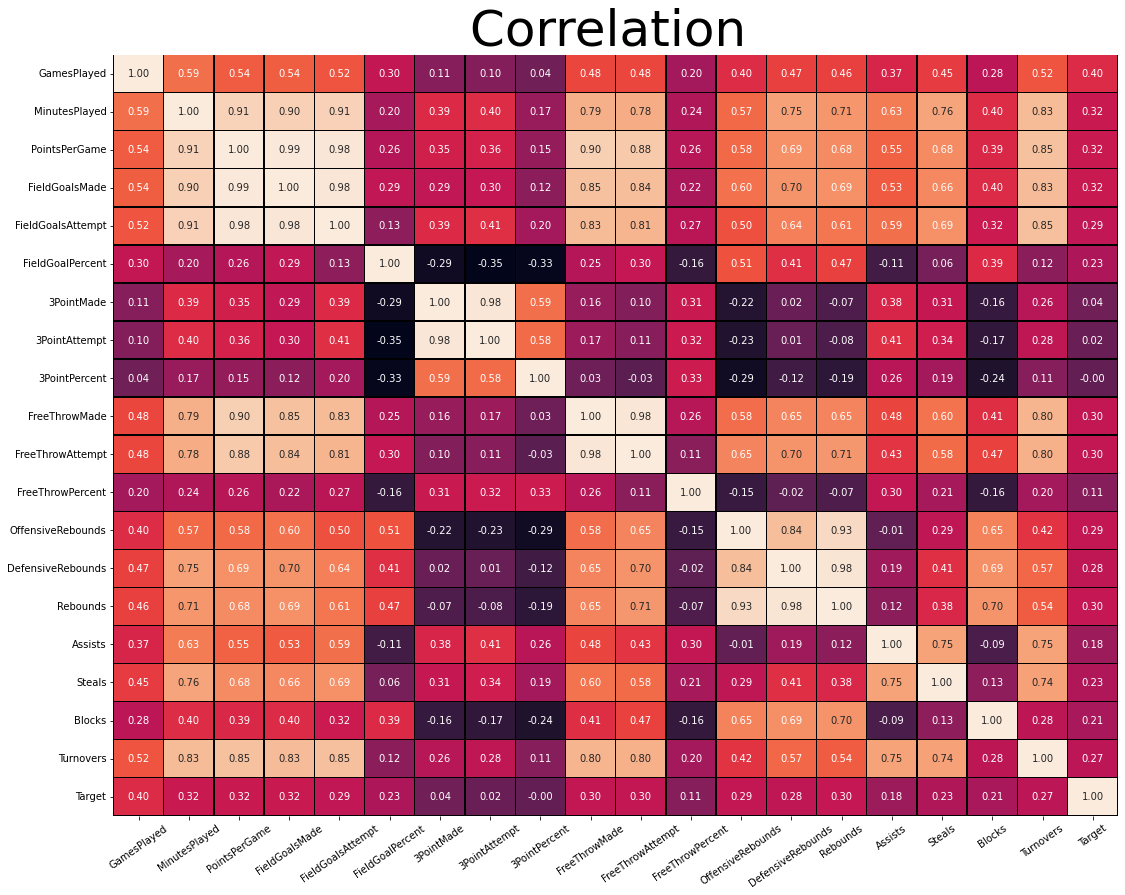

In [ ]:
plt.subplots(figsize=(18,14))
sns.heatmap(df.corr(),annot=True,linewidths=0.4,linecolor="black",fmt="1.2f",cbar=False)
plt.title("Correlation ",fontsize=50)
plt.xticks(rotation=35)
plt.show()

In [ ]:
df['3PointPercent']=df['3PointPercent'].fillna(df['3PointPercent'].mean())

In [ ]:
df=df.drop(['Name'],axis=1)

In [ ]:
y = df['Target']
X = df.drop(['Target'],axis=1)

In [ ]:
bestAcc = 0
numFeatures = 0
KNN_size = 0
logistic = False
SVM = False
tree = False
KNN = False
naive = False


for i in range(1,13):
        fvalue_selector = SelectKBest(f_classif, k=i)
        newX = fvalue_selector.fit_transform(X, y)
        
        X_train, X_test, y_train, y_test = train_test_split(newX, y, random_state=0, test_size=0.3)
    
        logistic = LogisticRegression(max_iter = 10000)
        logistic.fit(X_train, y_train)
        prediction = logistic.predict(X_test)
        score = accuracy_score(y_test, prediction)
        if score > bestAcc:
            bestAcc = score
            logistic = True
            SVM = False
            tree = False
            KNN = False
            naive = False
            numFeatures = i
        
        for j in range(1,10):
            knn = KNeighborsClassifier(n_neighbors = j)
            knn.fit(X_train, y_train)
            prediction = knn.predict(X_test)
            score = accuracy_score(y_test, prediction)
            if score > bestAcc:
                bestAcc = score
                numFeatures = i
                KNN_size = j
                logistic = False
                SVM = False
                tree = False
                KNN = True
                naive = False
                

        nb = GaussianNB()
        prediction = nb.fit(X_train, y_train).predict(X_test)
        score = accuracy_score(y_test, prediction)
        if score > bestAcc:
            bestAcc = score
            logistic = False
            SVM = False
            tree = False
            KNN = False
            naive = True
            numFeatures = i
        
        sv = svm.SVC()
        sv = sv.fit(X_train, y_train)
        prediction = sv.predict(X_test)
        score = accuracy_score(y_test, prediction)
        if score > bestAcc:
            bestAcc = score
            logistic = False
            SVM = True
            tree = False
            KNN = False
            naive = False
            numFeatures = i 
                
                
print("Лучшая точность", round(bestAcc, 5), ", используя столько фитч: ", numFeatures)


if logistic:
    print("Логрегрессия проявила себя, как лучшая модель.")
elif SVM:
    print("Метод опорных векторов проявил себя, как лучшая модель.")
elif naive:
    print("Наивный байесовский классификатор проявил себя, как лучшая модель")
else:
    print("Метод k-ближайших соседей проявил себя, как лучшая модель")

Лучшая точность 0.72886 , используя столько фитч:  8
Логрегрессия проявила себя, как лучшая модель.


In [ ]:
selector = SelectKBest(f_classif, k=numFeatures)
selector.fit(X, y)
cols = selector.get_support(indices=True)
topFeatures = X.iloc[:,cols]

print("Важные 8 фитч")
list(topFeatures.columns)

Важные 8 фитч


['GamesPlayed',
 'MinutesPlayed',
 'PointsPerGame',
 'FieldGoalsMade',
 'FreeThrowMade',
 'FreeThrowAttempt',
 'OffensiveRebounds',
 'Rebounds']

In [ ]:
df=pd.read_csv('/content/summary.csv')

In [ ]:
df['3PointPercent']=df['3PointPercent'].fillna(df['3PointPercent'].mean())

In [ ]:
df=df.drop(['Name'],axis=1)

In [ ]:
y = df['Target']
X = df.drop(['Target'],axis=1)

In [ ]:
fvalue_selector = SelectKBest(f_classif)
newX = fvalue_selector.fit_transform(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(newX, y, random_state=0, test_size=0.3)


In [ ]:
# Иной метод обучения без учителя
# Загрузка датасета
second_df = df
# Определяем модель и скорость обучения
model = TSNE(learning_rate=100)

# Обучаем модель
transformed = model.fit_transform(X_train, y_train)

# Представляем результат в двумерных координатах
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


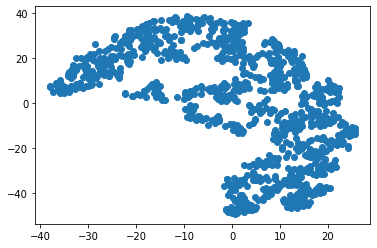

In [ ]:
plt.scatter(x_axis, y_axis )
plt.show()